In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
dataset = pd.read_csv('Position_Salaries.csv')

dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
X = dataset[['Level']]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [45]:
y = dataset[['Salary']]
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [46]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [47]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

y = y.ravel() #make it array
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

# SVR rbf

0.7516001070620798
[[0.2]]
[-0.35585076]


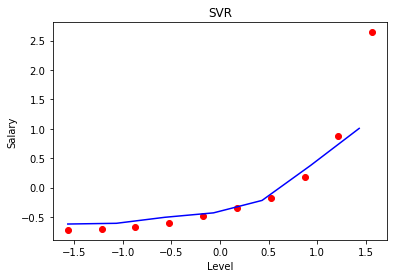

In [48]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
# regressor = SVR(kernel = 'linear')
regressor.fit(X, y)

print(regressor.score(X, y))

new = np.array([0.2])   # new = [[0.2]]
new = new.reshape(-1,1)
print(new)

y_pred = regressor.predict(new)#[[0.2]]
print(y_pred)

X_grid = np.arange(min(X), max(X), 0.5) #0.01,  this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [49]:
inv_new = sc_X.inverse_transform(new)
print(inv_new)

y_pred = sc_y.inverse_transform(y_pred) 
y_pred

[[6.07445626]]


array([148434.46775805])

# SVR linear

0.45378133514512575
[[0.2]]
[-0.17980018]


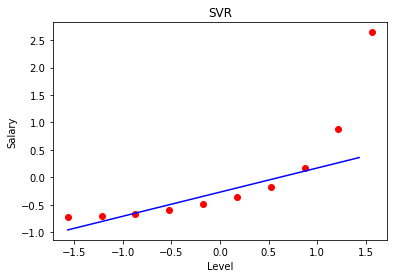

In [50]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'linear')
# regressor = SVR(kernel = 'linear')
regressor.fit(X, y)

print(regressor.score(X, y))

new = np.array([0.2])   # new = [[0.2]]
new = new.reshape(-1,1)
print(new)

y_pred = regressor.predict(new)#[[0.2]]
print(y_pred)

X_grid = np.arange(min(X), max(X), 0.5) #0.01,  this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [51]:
inv_new = sc_X.inverse_transform(new)
print(inv_new)

y_pred = sc_y.inverse_transform(y_pred) 
y_pred

[[6.07445626]]


array([198434.76954866])

## Here, linear line cant give the proper prediction, and cant give the best fit line.

# SVR is better than linear  support vector regression.